In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [19]:
def WeightedMean(var):
    weights = np.cos(np.deg2rad(var.lat))
    if len(var.shape) >= 2:
        return var.weighted(weights).mean(dim=('lat', 'lon'))
    else:
        return var.weighted(weights).mean("lat")

<xarray.DataArray ()>
array(-14.58334923)
Coordinates:
    time     datetime64[ns] 1851-07-16T11:30:00


0

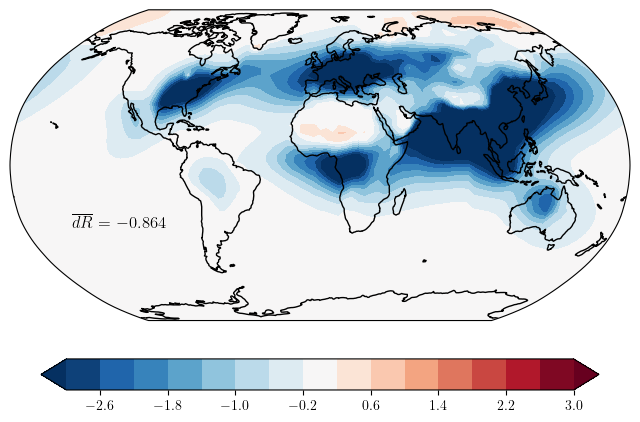

In [93]:
def plot():
    data = xr.open_dataset(f'~/documents/misu/paper_aerosols/clear-sky/datasets/abrupt-aerosol_1xemissions_bg1_2005_r1_all-plumes_clear-sky_PRP_yearmean.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = (data.dR_spd_sraf0 + data.dR_spd_traf0).isel(time=0)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-3, 3, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)

    ax.coastlines()
    
    ax.annotate(r'$\overline{dR}$ = '+'${:.3f}$'.format(WeightedMean(var)),
                [0.1, 0.3], xycoords="axes fraction", fontsize=12)
    print(var.min())

    plt.savefig('../../figures/prp-direct-clear-sky-2005.pdf')

    return 0 
plot()

<xarray.DataArray ()>
array(-8.86634636)
Coordinates:
    time     datetime64[ns] 1851-07-16T11:30:00


0

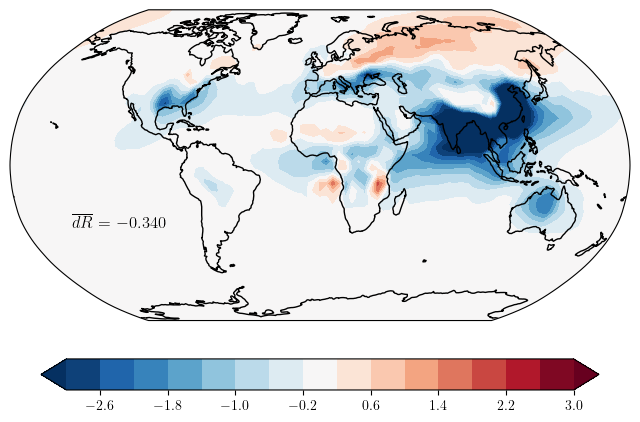

In [7]:
def plot():
    data = xr.open_dataset(f'~/documents/misu/paper_aerosols/clear-sky/datasets/abrupt-aerosol_1xemissions_bg1_2005_r1_all-plumes_clear-sky_PRP_yearmean.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = (data.dR_spd_srad0 + data.dR_spd_trad0).isel(time=0)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-3, 3, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)

    ax.coastlines()
    ax.annotate(r'$\overline{dR}$ = '+'${:.3f}$'.format(WeightedMean(var)),
                [0.1, 0.3], xycoords="axes fraction", fontsize=12)
    print(var.min())

    plt.savefig('../../figures/prp-direct-2005.pdf')

    return 0 
plot()

/tmp/ipykernel_5528/2832089262.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0

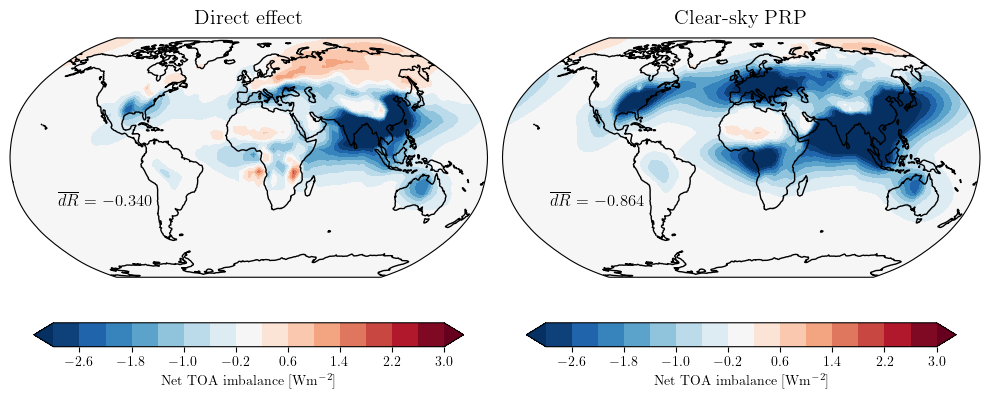

In [33]:
def plot():
    data = xr.open_dataset(f'~/documents/misu/paper_aerosols/clear-sky/datasets/abrupt-aerosol_1xemissions_bg1_2005_r1_all-plumes_clear-sky_PRP_yearmean.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), subplot_kw=dict(projection=projectionStyle)
    )

    var = (data.dR_spd_srad0 + data.dR_spd_trad0).isel(time=0)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax1.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-3, 3, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax1, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax1, orientation='horizontal', pad=0.04, label=r'Net TOA imbalance [Wm$^{-2}$]')#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)

    ax1.coastlines()
    ax1.annotate(r'$\overline{dR}$ = '+'${:.3f}$'.format(WeightedMean(var)),
                [0.1, 0.3], xycoords="axes fraction", fontsize=12)
    ax1.set_title('Direct effect', pad=10, fontsize=15)

    var = (data.dR_spd_sraf0 + data.dR_spd_traf0).isel(time=0)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax2.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-3, 3, 16), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax2, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax2, orientation='horizontal', pad=0.04, label=r'Net TOA imbalance [Wm$^{-2}$]')#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)

    ax2.coastlines()
    
    ax2.annotate(r'$\overline{dR}$ = '+'${:.3f}$'.format(WeightedMean(var)),
                [0.1, 0.3], xycoords="axes fraction", fontsize=12)
    ax2.set_title('Clear-sky PRP', pad=10, fontsize=15)
    plt.tight_layout()
    plt.savefig('../../figures/prp-direct-2005.pdf', bbox_inches='tight')

    return 0 
plot()

In [43]:
def plot_single_plume(effect, year, plume_number, ax, dRmin=-2, dRmax=2, ref='insert letter'):
    MACSP_dir = '/home/anthe/documents/misu/thesis/'

    macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')
    label=r'$dR$ [Wm$^{-2}$]'

    data = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc').squeeze()
    if effect == 'total':
        single = (data[f'dR_sp{plume_number}_sraf0'] + data[f'dR_sp{plume_number}_traf0']).isel(time=(year - 1950))
    elif effect == 'direct':
        single = (data[f'dR_spd{plume_number}_sraf0'] +data[f'dR_spd{plume_number}_traf0']).isel(time=(year - 1950))
    elif effect == 'indirect':
        single = (data[f'dR_spi{plume_number}_sraf0'] +data[f'dR_spi{plume_number}_traf0']).isel(time=(year - 1950))
    single_w = WeightedMean(single)
    single = single.where((single > 0.001) | (single < -0.001))
    #if single_w < 0:
    #    single_std = - single / single_w# change relative to the global mean
    #        # negative to get an intuitive color scale in cooling experiments
    #else:
    #    single_std = single / single_w

    lon = single.coords['lon']
    lon_idx = single.dims.index('lon')
    wrap_single_std, wrap_lon = add_cyclic_point(single.values, coord=lon, axis=lon_idx)
    if -single_w >= 0.5:
        dRmin=-5
        dRmax=5
        cmap='RdBu_r'
    elif 0.5 > -single_w > 0.05:
        dRmin=-2
        dRmax=2
        cmap='RdBu_r'
    elif 0.05 > -single_w > 0.01:
        dRmin=-0.5
        dRmax=0.5
        cmap='RdBu_r'
    elif 0.01 > -single_w > 0.003:
        dRmin=-0.2
        dRmax=0.2
        cmap='RdBu_r'
    else:
        dRmin=-0.5
        dRmax=0.5
        cmap='RdBu_r'
    pc = ax.contourf(wrap_lon,
        single.lat,
        wrap_single_std,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels= np.linspace(dRmin, dRmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='100%', height='10%', loc="lower center", borderpad= -1.8)

    if -single_w >= 0.5:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax+ 1.5, 2.5), label=label)
    elif 0.5 > -single_w > 0.05:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax+1, 1), label=label)
    elif 0.05 > -single_w > 0.01:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax+0.25, 0.25), label=label)
    elif 0.05 > -single_w > 0.01:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax+0.25, 0.25), label=label)
    elif 0.01 > -single_w > 0.003:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax+0.1, 0.1), label=label)
    else:
        cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=np.arange(dRmin, dRmax + 0.25, 0.25), label=label)

    transform = ccrs.PlateCarree()._as_mpl_transform(ax)

    ax.plot(
            macsp.plume_lon.sel(plume_number=plume_number),
            macsp.plume_lat.sel(plume_number=plume_number),
            marker="^",
            color="darkorange",
            #markerfacecolor='none',
            markersize=3,
            transform=transform,
        )

    ax.coastlines()
    ax.set_title(ref + ' '+ macsp.attrs[f'plume{plume_number}_region'], pad=5, fontsize=11)
    ax.annotate(r'$\overline{dR}$ = '+'${:.3f}$'.format(single_w),
                [-0.05, -0.55], xycoords="axes fraction", fontsize=9)

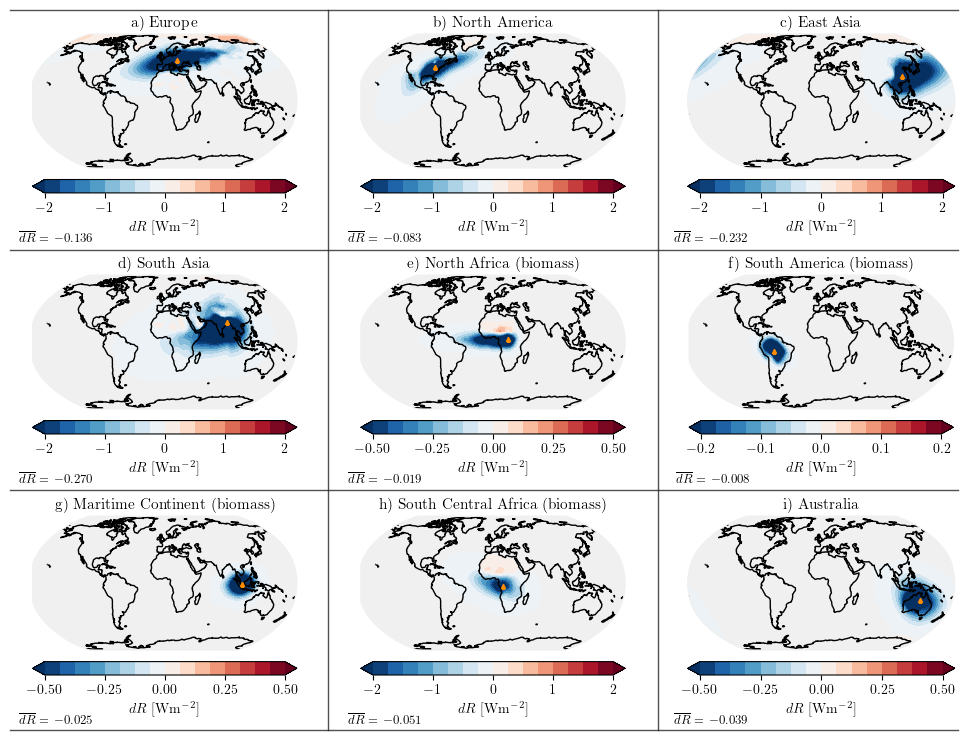

In [83]:
def multi_plot(effect):

    central_longitude = 0#210
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, axes = plt.subplots(
    3, 3, figsize=(12, 8), subplot_kw=dict(projection=projectionStyle)
    )

    #axes[0,2] = plt.subplot(331, projection=ccrs.Robinson(central_longitude=210))
        # Set the background color of the plot
    for i in range(0,3,1):
        for ax in axes[:,i]:
            ax.set_facecolor('#F0F0F0')

            # Remove the frame around the map
            for spine in ax.spines.values():
                spine.set_edgecolor('#F0F0F0')

    # --- Create "grid" between subplots ---------------------------------------------------
    lw = 1
    color = "#262626"
    alpha = 0.8

    x, y = np.array([[0.11, 0.9], [0.91, 0.91]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    x, y = np.array([[0.11, 0.9], [0.61, 0.61]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    x, y = np.array([[0.11, 0.9], [0.31, 0.31]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    x, y = np.array([[0.11, 0.9], [0.01, 0.01]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    x, y = np.array([[0.375, 0.375], [0.01, 0.91]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    x, y = np.array([[0.65, 0.65], [0.01, 0.91]])
    line = Line2D(x, y, lw=lw, color=color, alpha=alpha)
    fig.add_artist(line)

    #------------------- Plots T and F -------------------------------
    ref=['a)', 'b)', 'c)',
         'd)', 'e)', 'f)',    
         'g)', 'h)', 'i)']
    clon=[0, 210, 210, 
          210 ,210, 210,
          210, 210, 210]
    for i in range(0, 3, 1):
        iplume = i + 1
        plot_single_plume(effect, year=2005, plume_number=iplume, ax=axes[0, i], ref=ref[i])
        iplume = i + 4
        plot_single_plume(effect, year=2005, plume_number=iplume, ax=axes[1, i], ref=ref[i+3])
        iplume = i + 7
        plot_single_plume(effect, year=2005, plume_number=iplume, ax=axes[2, i], ref=ref[i+6])

    plt.subplots_adjust(hspace=0.8)

    # --- Print descriptions ---------------------------------------------------------------
   # fig.suptitle(f'Abrupt 5xemissions-bg1 - 2005 patterns', fontsize=15)
    plt.savefig(f'../figures//Maps_single-plumes_clear-sky_{effect}.pdf', bbox_inches='tight')


multi_plot(effect='direct')


In [2]:
srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_monmean_1950-2013.nc')
prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')
clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_monmean_1950-2013.nc')

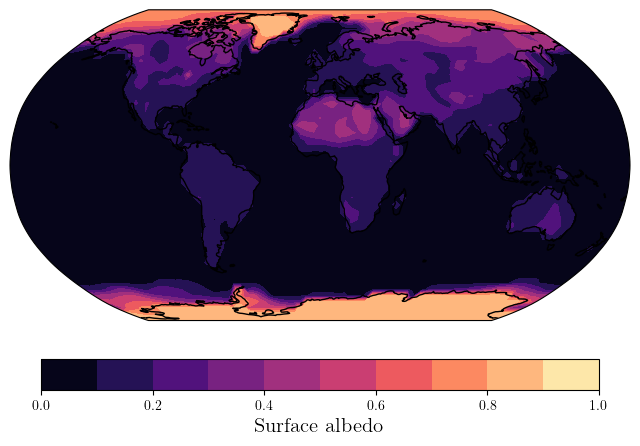

In [5]:
def plot(year):
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')

    time = year - 1950
    #albedo = srad.albedo.isel(time=time)
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = albedo
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='magma',
        levels= [0, 0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]#np.linspace(0, 1.1, 17), #np.linspace(Nmin, Nmax, 17),
        #extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Surface albedo', size=15, weight='bold')

    ax.coastlines()


plot(2005)

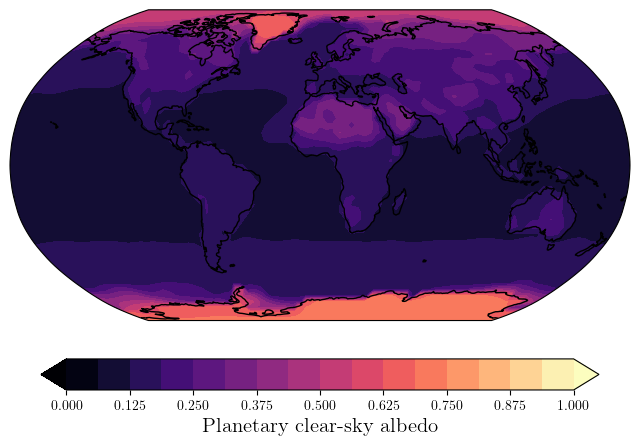

In [29]:
def plot(year):
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')

    time = year - 1950
    #albedo = srad.albedo.isel(time=time)
    albedo = - (srad.sraf0.isel(time=time) - srad.srad0d.isel(time=time))/(srad.srad0d.isel(time=time))

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = albedo
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='magma',
        levels= np.linspace(0, 1, 17), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Planetary clear-sky albedo', size=15, weight='bold')

    ax.coastlines()


plot(2005)

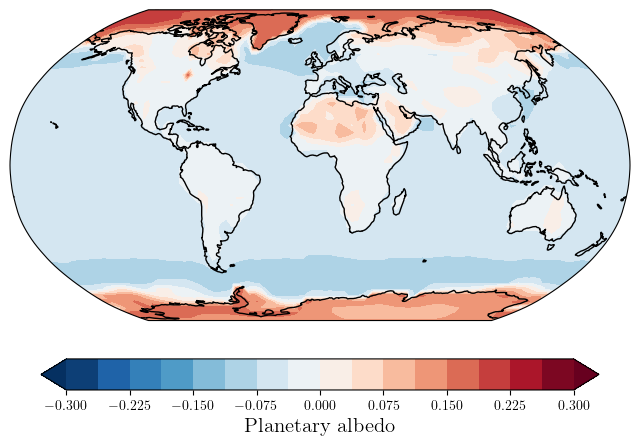

In [28]:
def plot(year):
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')

    time = year - 1950
    #albedo = srad.albedo.isel(time=time)
    albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time)) - - (srad.sraf0.isel(time=time) - srad.srad0d.isel(time=time))/(srad.srad0d.isel(time=time))


    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = albedo
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    #cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='RdBu_r',
        levels= np.linspace(-0.3, 0.3, 17), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Planetary albedo', size=15, weight='bold')

    ax.coastlines()


plot(2005)

In [9]:
def plot_direct():

    fig = plt.figure()
    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    forcing = (clearSky.dR_spd_sraf0 + clearSky.dR_spd_traf0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,10], bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.0,1])

    plt.xlabel('Surface albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()

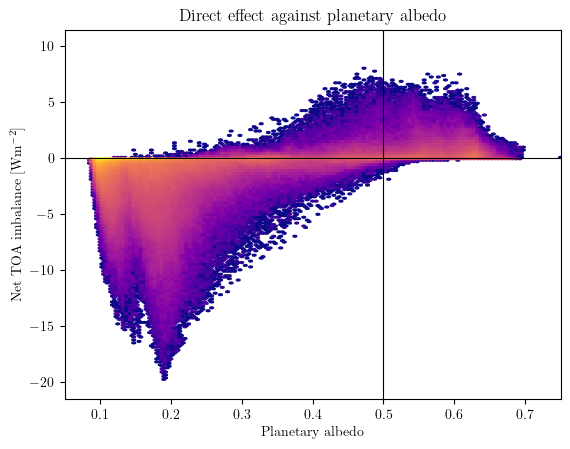

In [17]:
def plot():

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    albedo = - (srad.sraf0 - srad.srad0d)/(srad.srad0d)
    albedo = albedo.where((albedo > 0) & (albedo < 1))
    forcing = (clearSky.dR_spd_sraf0 + clearSky.dR_spd_traf0)
    forcing = forcing.where((forcing > 0.01) | (forcing < - 0.01))

    fig, ax = plt.subplots()
    #ax.hexbin(albedo, forcing, bins=10, extent=[0.05, 0.8, -14, 14])
    
    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,10], bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.05,0.75])

    plt.xlabel('Planetary albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against planetary albedo')

plot()

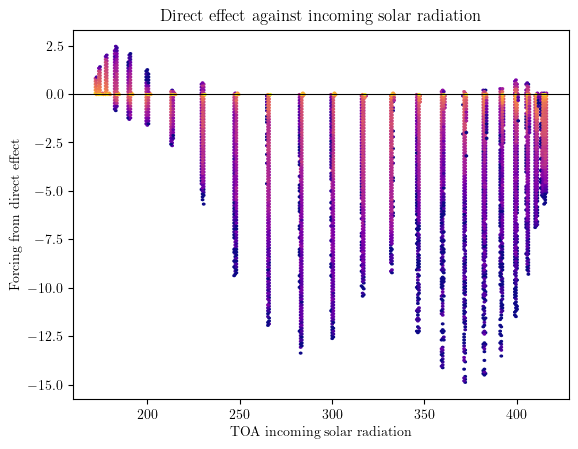

In [32]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc')

    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (clearSky.dR_spd_sraf0 + clearSky.dR_spd_traf0)
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation')
    plt.ylabel('Forcing from direct effect')

    plt.title('Direct effect against incoming solar radiation')

plot()

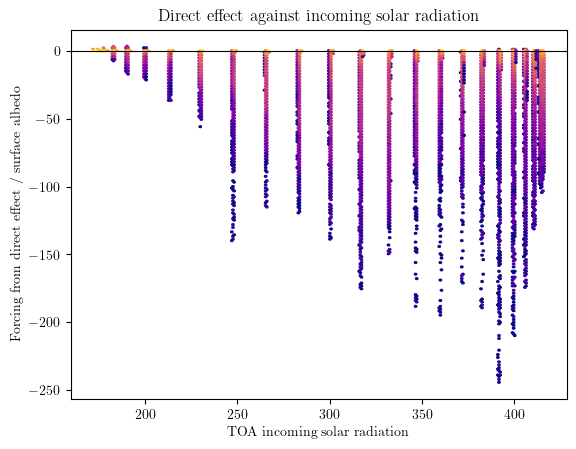

In [58]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc')
    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (clearSky.dR_spd_sraf0 + clearSky.dR_spd_traf0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(irradiance, forcing, s=1, color='black', marker='x', linewidths=0.5)
    plt.hexbin(irradiance.values, forcing.values/albedo.values, gridsize=200, bins='log', cmap='plasma')
    plt.axhline(0, color='black', linewidth=0.8)
    #plt.axvline(0.5, color='black', linewidth=0.8)

    plt.xlabel('TOA incoming solar radiation ')
    plt.ylabel('Forcing from direct effect / surface albedo')

    plt.title('Direct effect against incoming solar radiation')

plot()

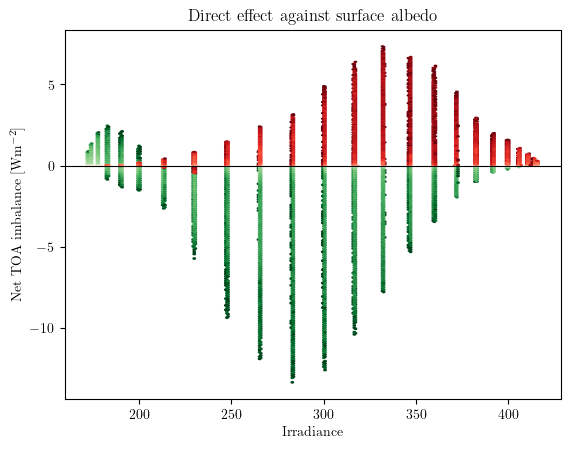

In [87]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc').squeeze()
    #time = year - 1850
    #albedo = - srad.sradsu.isel(time=time) /(srad.srads.isel(time=time) - srad.sradsu.isel(time=time))
    irradiance = srad.srad0d
    forcing = (clearSky.dR_spd1_sraf0 + clearSky.dR_spd1_traf0)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log', cmap='Greens_r')

    forcing = (clearSky.dR_spd2_sraf0 + clearSky.dR_spd2_traf0)
    plt.hexbin(irradiance, -forcing, gridsize=200, bins='log', cmap='Reds_r')

    plt.axhline(0, color='black', linewidth=0.8)

    plt.xlabel('Irradiance')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()

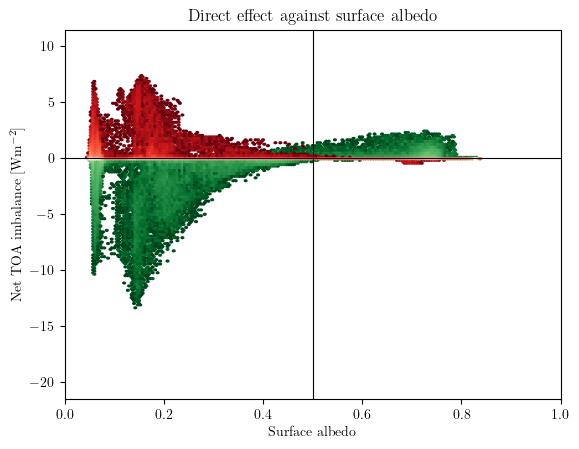

In [86]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc').squeeze()

    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    forcing = (clearSky.dR_spd1_sraf0 + clearSky.dR_spd1_traf0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,10], bins='log', cmap='Greens_r')

    forcing = (clearSky.dR_spd2_sraf0 + clearSky.dR_spd2_traf0)
    plt.hexbin(albedo, -forcing, gridsize=200, extent=[0,1,-20,10], bins='log', cmap='Reds_r')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.0,1])

    plt.xlabel('Surface albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()

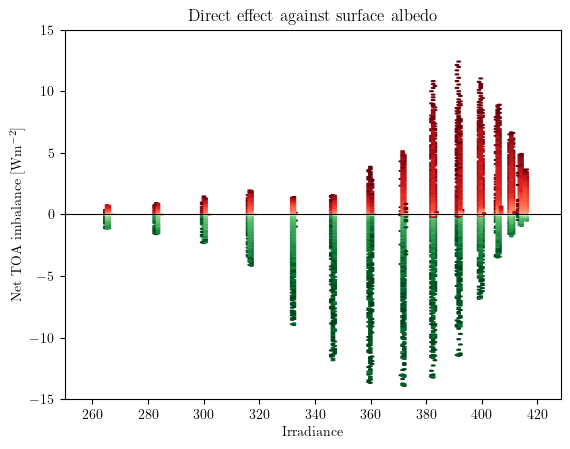

In [91]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc').squeeze()

    irradiance = srad.srad0d
    forcing = (clearSky.dR_spd3_sraf0 + clearSky.dR_spd3_traf0)
    plt.hexbin(irradiance, forcing, gridsize=200, bins='log', cmap='Greens_r')

    forcing = (clearSky.dR_spd4_sraf0 + clearSky.dR_spd4_traf0)
    plt.hexbin(irradiance, - forcing, gridsize=200, bins='log', cmap='Reds_r')
    plt.xlim([250,None])
    plt.ylim([-15,15])

    plt.axhline(0, color='black', linewidth=0.8)

    plt.xlabel('Irradiance')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()

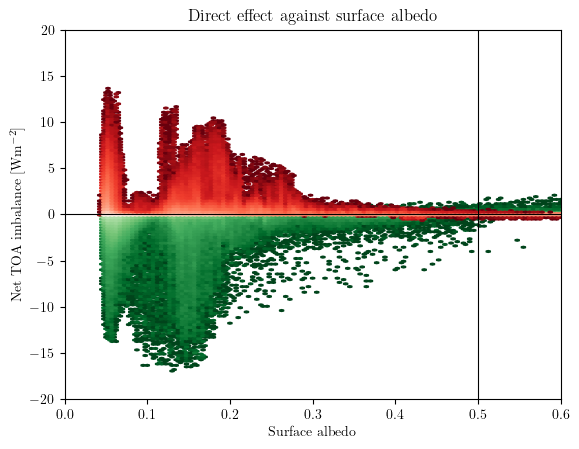

In [31]:
def plot():
    srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_monmean_1950-2013.nc')
    clearSky = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_monmean_1950-2013_all.nc').squeeze()

    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    forcing = (clearSky.dR_spd3_sraf0)# + clearSky.dR_spd3_traf0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    plt.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,15], bins='log', cmap='Greens_r')

    forcing = (clearSky.dR_spd4_sraf0)# + clearSky.dR_spd4_traf0)
    plt.hexbin(albedo, - forcing, gridsize=200, extent=[0,1,-20,15], bins='log', cmap='Reds_r')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0.5, color='black', linewidth=0.8)
    plt.xlim([0.0,0.6])
    plt.ylim([-20,20])

    plt.xlabel('Surface albedo')
    plt.ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()


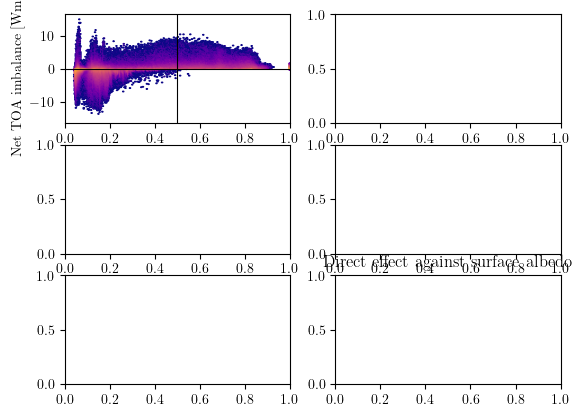

In [17]:
def plot():

    fig, ax = plt.subplots(3,2)

    srad = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
    prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')

    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)
    forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
    
    #forcing = forcing.where((forcing > 0.05) | (forcing < - 0.05))

    #plt.scatter(albedo, forcing, s=1, color='black', marker='x', linewidths=1)
    ax[0,0].hexbin(albedo, forcing, gridsize=200, extent=[0,1,-15,15], bins='log', cmap='plasma')
    ax[0,0].axhline(0, color='black', linewidth=0.8)
    ax[0,0].axvline(0.5, color='black', linewidth=0.8)
    ax[0,0].set_xlim([0.0,1])

    ax[0,0].set_xlabel('Surface albedo')
    ax[0,0].set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]')

    plt.title('Direct effect against surface albedo')

plot()